In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
s_df = pd.read_csv('/content/drive/MyDrive/ML/서울시_아파트_전세_17~24_결측치 수정.csv')

In [ ]:
# 통계 정보 값이 너무 커서 지수로 표현될 떄 변환
pd.set_option("float_format", "{:.0f}".format)

# df 테이블 행 모두 출력되도록 펼치는 방법
pd.set_option('display.max_rows', 10000)

## 2차 이상치 처리

In [ ]:
s_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
s_df = s_df.rename(columns={'보증금(만원)':'전세가(만원)'})

In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원)
count,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031
unique,NaN,25,338,NaN,NaN,NaN,NaN,NaN,NaN,8051,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,NaN
freq,NaN,79670,31794,NaN,NaN,NaN,NaN,NaN,NaN,6974,NaN
mean,2020,NaN,NaN,590,5,9,75,48211,2001,NaN,641
std,2,NaN,NaN,569,38,6,28,30142,12,NaN,293
min,2017,NaN,NaN,0,0,-4,10,500,1961,NaN,4
25%,2019,NaN,NaN,195,0,4,60,29500,1992,NaN,447
50%,2020,NaN,NaN,498,0,8,79,42000,2001,NaN,589
75%,2022,NaN,NaN,800,0,13,85,60000,2010,NaN,768


In [ ]:
# 전세가 이상치 측정
price_1 = s_df[s_df['전세가(만원)'] >= 150000]
print("평당 전세가가 15억원 이상 갯수:", len(price_1))
price_2 = s_df[s_df['전세가(만원)'] >= 250000]
print("평당 전세가가 25억원 이상 갯수:", len(price_2))
price_3 = s_df[s_df['전세가(만원)'] >= 400000]
print("평당 전세가가 40억원 이상 갯수:", len(price_3))

평당 전세가가 15억원 이상 갯수: 11749
평당 전세가가 25억원 이상 갯수: 1208
평당 전세가가 40억원 이상 갯수: 133


In [ ]:
# 평당 전세가 이상치 측정
per_price_1 = s_df[s_df['평당 전세가(만원)'] >= 1500]
print("평당 전세가가 1500 이상 갯수:", len(per_price_1))
per_price_2 = s_df[s_df['평당 전세가(만원)'] >= 2000]
print("평당 전세가가 2000 이상 갯수:", len(per_price_2))
per_price_3 = s_df[s_df['평당 전세가(만원)'] >= 3000]
print("평당 전세가가 3000 이상 갯수:", len(per_price_3))

평당 전세가가 1500 이상 갯수: 15558
평당 전세가가 2000 이상 갯수: 2268
평당 전세가가 3000 이상 갯수: 48


In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
dtype: int64

In [ ]:
#이상치 제거
s_df = s_df[(s_df['층'] >= 1) & (s_df['임대면적'] <= 150) & (s_df['전세가(만원)'] <= 300000)]

In [ ]:
# 899,031 -> 883,545 (15,486개)
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원)
count,883545,883545,883545,883545,883545,883545,883545,883545,883545,883545,883545
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7681,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,NaN
freq,NaN,78040,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,NaN
mean,2020,NaN,NaN,592,5,9,74,46922,2001,NaN,640
std,2,NaN,NaN,570,36,6,24,27223,12,NaN,291
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,4
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,447
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,589
75%,2022,NaN,NaN,800,0,13,85,59000,2010,NaN,768


In [ ]:
#이상치 제거
s_df = s_df[(s_df['평당 전세가(만원)'] <= 2000)]

In [ ]:
# 883,545 -> 881,478 (2,067개)
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원)
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7675,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,NaN
freq,NaN,77969,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,NaN
mean,2020,NaN,NaN,593,5,9,74,46638,2001,NaN,636
std,2,NaN,NaN,571,36,6,24,26471,11,NaN,281
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,4
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,447
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,588
75%,2022,NaN,NaN,800,0,13,85,58500,2010,NaN,767


In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
dtype: int64

In [ ]:
s_df.reset_index(drop=True, inplace=True)

In [ ]:
s_df.to_csv('/content/drive/MyDrive/ML_이상치제거_0322', index=False, encoding='utf-8-sig')

## 스케일링/인코딩

In [ ]:
# 연속형 데이터에 대한 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def numeric_sc(df):
    mm_sc = MinMaxScaler()
    sd_sc = StandardScaler()

    sd_sc.fit(s_df[['임대면적','건축년도']])
    df[['임대면적sc', '건축년도sc']] = sd_sc.transform(df[['임대면적', '건축년도']])

    mm_sc.fit(s_df[['층']])
    df[['층mm']] = mm_sc.transform(df[['층']])

    return df

numeric_sc(s_df).describe()

,접수년도,본번,부번,층,임대면적,전세가(만원),건축년도,평당 전세가(만원),임대면적sc,건축년도sc,층mm
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
mean,2020,593,5,9,74,46638,2001,636,-0,-0,0
std,2,571,36,6,24,26471,11,281,1,1,0
min,2017,0,0,1,10,500,1961,4,-3,-4,0
25%,2019,199,0,4,60,29000,1992,447,-1,-1,0
50%,2020,501,0,8,76,42000,2001,588,0,-0,0
75%,2022,800,0,13,85,58500,2010,767,0,1,0
max,2024,4974,2837,67,150,290000,2024,2000,3,2,1


In [ ]:
# 범주형 데이터에 대한 인코딩
!pip install category_encoders
import category_encoders as ce

def get_category(df):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder

    le1 = LabelEncoder()
    le2 = LabelEncoder()
    oh1 = OneHotEncoder()
    oh2 = OneHotEncoder()
    oh3 = OneHotEncoder()
    be = ce.BinaryEncoder()

    #le.fit(s_df[['자치구명']])
    #df['자치구명le'] = le.transform(df['자치구명'])
    # 각 고유 숫자마다 가중치로 인식되는 문제.. (해당 인코딩은 랜덤포레스트 사용 시)
    df.reset_index(drop=True, inplace=True)

    le1.fit(s_df[['접수년도']])
    df['접수년도le'] = le1.transform(df[['접수년도']])

    le2.fit(s_df[['건축년도']])
    df['건축년도le'] = le2.transform(df[['건축년도']])

    df['본번'] = df['본번'].astype('category')
    # BinaryEncoder를 사용하여 '본번' 열 인코딩
    df_encoded1 = bn_ec.fit_transform(df['본번'])
    # 인코딩된 데이터프레임 병합
    df = pd.concat([df, df_encoded1], axis=1)

    df['부번'] = df['부번'].astype('category')
    df_encoded2 = bn_ec.fit_transform(df['부번'])
    df = pd.concat([df, df_encoded2], axis=1)

    # 범주형 변수 이진 벡터로 변환하여 새로운 열 추가
    oh1.fit(s_df[['자치구명']])
    자치구명_csr = oh1.transform(df[['자치구명']])

    자치구명_csr_df = pd.DataFrame(자치구명_csr.toarray(),
                               columns = oh1.get_feature_names_out())
    df = pd.concat([df, 자치구명_csr_df], axis=1)

    # Target Encoder 초기화
    encoder = ce.TargetEncoder(cols=['법정동명'])

    # Target Encoding 적용
    df_encoded = encoder.fit_transform(df['법정동명'], df['전세가(만원)'])
    # 컬럼 이름 변경
    df_encoded.columns = ['법정동명te']

    df = pd.concat([df, df_encoded], axis=1)
    return df

s_df = get_category(s_df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


NameError: name 's_df' is not defined

In [ ]:
s_df.columns

Index(['접수년도', '자치구명', '법정동명', '본번', '부번', '층', '임대면적', '전세가(만원)', '건축년도',
       '건물명', '평당 전세가(만원)', '임대면적sc', '건축년도sc', '층mm', '접수년도le', '자치구명_강남구',
       '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구', '자치구명_광진구', '자치구명_구로구',
       '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구', '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구',
       '자치구명_서대문구', '자치구명_서초구', '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구',
       '자치구명_영등포구', '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
       '법정동명te'],
      dtype='object')

In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
임대면적sc        0
건축년도sc        0
층mm           0
접수년도le        0
자치구명_강남구      0
자치구명_강동구      0
자치구명_강북구      0
자치구명_강서구      0
자치구명_관악구      0
자치구명_광진구      0
자치구명_구로구      0
자치구명_금천구      0
자치구명_노원구      0
자치구명_도봉구      0
자치구명_동대문구     0
자치구명_동작구      0
자치구명_마포구      0
자치구명_서대문구     0
자치구명_서초구      0
자치구명_성동구      0
자치구명_성북구      0
자치구명_송파구      0
자치구명_양천구      0
자치구명_영등포구     0
자치구명_용산구      0
자치구명_은평구      0
자치구명_종로구      0
자치구명_중구       0
자치구명_중랑구      0
법정동명te        0
dtype: int64

In [ ]:
# X, y 훈련/테스트 변수 설정
from sklearn.model_selection import train_test_split

X = s_df[['임대면적sc', '건축년도sc','층mm', '접수년도le', '본번', '부번',
        '자치구명_강남구', '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구',
        '자치구명_광진구', '자치구명_구로구', '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구',
        '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구', '자치구명_서대문구', '자치구명_서초구',
        '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구', '자치구명_영등포구',
        '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
       '법정동명te']]
y = s_df['전세가(만원)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 훈련/테스트 갯수 확인
len(X_train), len(y_train), len(X_test), len(y_test)

(705182, 705182, 176296, 176296)

In [ ]:
# 랜덤포레스트모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#+a MAE, MSE, RMSE, R-squared(수정된 R2도 고민)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split =10)

model_rf.fit(X_train, y_train)

y_rf_pred = model_rf.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('rf ', y_test, y_rf_pred)

rf  MAE:  5036.73 , MSE:  69410513.07 , RMSE:  8331.3 , R2 Score:  0.9


In [ ]:
# adjusted R-squared
r2 = 0.91
adj_r2 = 1 - ( 1 - r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print(adj_r2)

0.9099836607796304


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


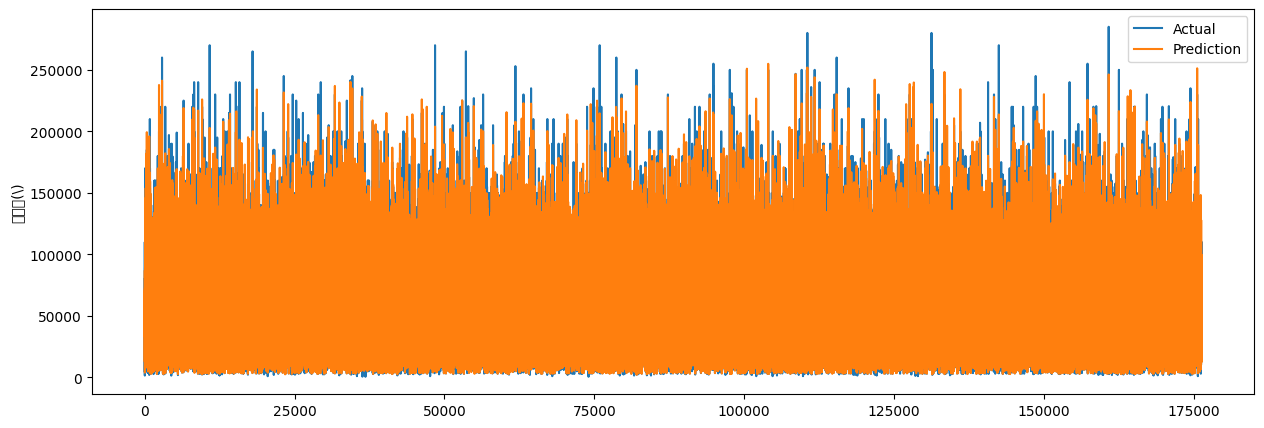

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_rf_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("변수 중요도:")
for i, index in enumerate(sorted_indices):
    feature = X.columns[index]
    importance = round(importances[index], 4)
    print(f"{i+1}. {feature}: {importance}")

변수 중요도:
1. 법정동명te: 0.3864
2. 임대면적sc: 0.336
3. 건축년도sc: 0.1189
4. 접수년도le: 0.0565
5. 본번: 0.0366
6. 층mm: 0.025
7. 부번: 0.0098
8. 자치구명_강남구: 0.0092
9. 자치구명_종로구: 0.0028
10. 자치구명_양천구: 0.0023
11. 자치구명_서초구: 0.0021
12. 자치구명_용산구: 0.0016
13. 자치구명_송파구: 0.0016
14. 자치구명_강동구: 0.0014
15. 자치구명_성동구: 0.0013
16. 자치구명_마포구: 0.0013
17. 자치구명_동작구: 0.0011
18. 자치구명_은평구: 0.001
19. 자치구명_강서구: 0.0008
20. 자치구명_노원구: 0.0007
21. 자치구명_영등포구: 0.0006
22. 자치구명_서대문구: 0.0005
23. 자치구명_광진구: 0.0004
24. 자치구명_성북구: 0.0004
25. 자치구명_구로구: 0.0004
26. 자치구명_동대문구: 0.0003
27. 자치구명_중구: 0.0003
28. 자치구명_중랑구: 0.0002
29. 자치구명_금천구: 0.0001
30. 자치구명_관악구: 0.0001
31. 자치구명_강북구: 0.0001
32. 자치구명_도봉구: 0.0001
